In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/significant_month.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-05-22T03:19:35.341Z,35.8112,25.8577,64.0,6.2,mww,142,35,0.946,0.95,...,2025-05-31T21:51:49.624Z,"61 km NNE of Eloúnda, Greece",earthquake,5.60,1.870,0.036,75,reviewed,us,us
1,2025-05-20T15:05:58.274Z,-3.7535,144.8032,10.0,6.5,mww,304,17,3.072,0.58,...,2025-05-22T00:30:11.757Z,"88 km ENE of Angoram, Papua New Guinea",earthquake,7.75,1.694,0.043,52,reviewed,us,us
2,2025-05-14T04:15:40.513Z,-18.7126,-175.3343,260.0,6.4,mww,262,30,5.518,0.70,...,2025-05-31T04:45:00.494Z,"142 km W of Neiafu, Tonga",earthquake,10.42,1.918,0.047,43,reviewed,us,us
3,2025-05-13T22:51:15.665Z,35.2315,26.9923,74.0,6.0,mww,123,42,1.343,0.56,...,2025-05-28T22:22:21.450Z,"21 km SSE of Fry, Greece",earthquake,6.15,1.880,0.035,80,reviewed,us,us
4,2025-05-11T21:11:22.060Z,29.0558,87.6123,9.0,5.5,mww,151,22,2.406,0.67,...,2025-05-26T21:34:38.533Z,"125 km W of Rikaze, China",earthquake,8.16,1.716,0.080,15,reviewed,us,us


In [4]:
data = df[['latitude', 'longitude', 'depth', 'mag']].dropna()
X = data[['latitude', 'longitude', 'depth']]
y = data['mag']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = Sequential([
    Dense(64, input_dim=3, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # output: prediksi magnitudo
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [10]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_split=0.2)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 35.8291 - mae: 5.9471 - val_loss: 22.0361 - val_mae: 4.3961
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 35.4029 - mae: 5.9121 - val_loss: 21.8942 - val_mae: 4.3772
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 34.9923 - mae: 5.8782 - val_loss: 21.7519 - val_mae: 4.3583
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - loss: 34.5840 - mae: 5.8442 - val_loss: 21.6028 - val_mae: 4.3387
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - loss: 34.1791 - mae: 5.8103 - val_loss: 21.4527 - val_mae: 4.3189
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - loss: 33.7835 - mae: 5.7769 - val_loss: 21.3081 - val_mae: 4.2996
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - loss: 33.4092 - mae: 5.7453 - val_loss: 21.1608 - val_mae: 4.2801
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step - loss: 33.0434 - mae: 5.7141 - val_loss: 21.0155 - val_mae: 4.2607
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - loss: 32.6764

In [11]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Absolute Error: {mae}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 12.4628 - mae: 3.3226
Mean Absolute Error: 3.3225839138031006


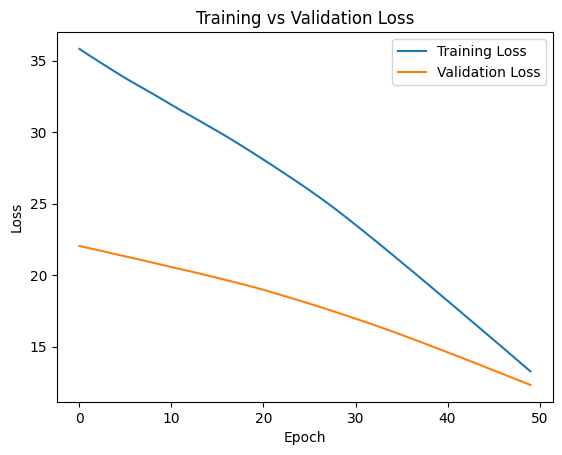

In [12]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.show()

In [13]:
sample = np.array([[37.75, -122.68, 10]])
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print(f"Prediksi magnitudo: {prediction[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediksi magnitudo: 2.31
